# Lab 4: Inductor Testing & Analysis
#### Andrew Phillips

## Prelab: Design & Manufacture Inductor

During the prelab, we designed and manufactured a ferrite core inductor to operate with our lab hardware operating in buck converter mode. This design involved calculations to find the minimum number of turns required to prevent core saturation, the required air gap achieve the desired inductance, and calculations to verify that our inductor's magnetic reluctance fell within real world constraints.

### Calculations

To start our inductor design, we began by calculating the minimum number of turns required to prevent our inductor's core from calculating, using the equation below:

![min_turns_calc](images/min_turns_calc.jpg)

Given parameters:

- Desired inductance: 18uH
- Peak current: 6A
- Peak flux density in core: 200mT
- Minimum cross-sectional area of core: 62.6mm^2

Using the given parameters, we calculated the minimum number of turns required to be 10 (rounding up from a calculated value of 9.14). We initially started using this value to calculate the minimum air gap required using the equation below:

![air_gap_calc](images/air_gap_calc.jpg)

For this calculation we calculated the cross sectional area using the air gap length approximation shown in lecture 6:

![air_gap_approx](images/air_gap_approx.jpg)

This gave us an approximate cross sectional area of 151.4mm^2. Our initial calculation for the required air gap gave us values that were much higher than we thought were reasonable (in the range of 100 thou). Because of this, we ended up reducing the amount of turns in our inductor to 5 to reduce the air gap required. In retrospect, we should have trusted our initial minimum turns calculation and used the larger air gap. Using 5 turns, these calculations gave us a required air gap of 0.254mm.

Finally, using these parameters, we performed calculations to ensure our inductor's magnetic reluctance adhered to real world magnetic constraints, shown in the equation below:

![rel_reqs](images/reluctance_reqs.jpg)

Using these limits, we calculated a lower reluctance limit of 4.83e6 H^-1, and an upper reluctance limit of 6.40e6 H^-1. With our inductor's parameters, we calculated a reluctance of 1.33e6 H^-1, which should have signified that we needed to increase the number of turns in our inductor to avoid core saturation. We will make sure to account for these limits moving forward into designing transformers!

Finally, when determining what wire gauge to use, we determined that we had to use 18AWG wire to satisfy the max RMS current density of 10Arms/mm^2 in copper wire.

### Fabrication and LCR Testing

With these parameters, we moved on to fabricating our inductor. We wound 5 turns of 18AWG wire around a bobbin and used several pieces of shim stock to create a 0.254mm air gap (~10thou). Measuring our results on the LCR meter, this resulted in an inductance too small, so we had to reduce the air gap to 2 thou, resulting in a measured inductance of 19.53uH.

![induc_measurement_1](images/inductance_measure_1.jpg)

We then soldered the ends of our inductor to the bobbin, which resulted in a slight inductance increase to 20.03uH.

![induct_measurement_2](images/inductance_measure_2.jpg)

With this finalized inductor, we moved on to the lab experiments.

## Data Collection

During the lab period, configured our lab hardware for buck operation, inserted our custom inductor, connected scope probes to the drain voltage of the switching FET and shunt voltage of our shunt resistor. With this setup, we captured waveforms to calculate the inductance of our custom inductor from lab testing. We captured these waveforms at 100mV peak shunt voltage and 200mV peak shunt voltage.

Lab questions 1-6: 

Power supply current at 100mV peak shunt: 0.4A

Power supply current at 200mV peak shunt: 0.79A

In [17]:
# import necessary python libraries
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy

In [18]:
# read funky Rigol CSV format
def read_rigol_csv(csv_file_name):
    with open(csv_file_name) as f:
        rows = list(csv.reader(f))
        i = 0
        while rows[0][i] != "":
            i = i+1
        numcols = i-2
        t0 = float(rows[1][numcols])
        dT = float(rows[1][numcols+1])
    data = pd.read_csv(csv_file_name, usecols=range(0,numcols), skiprows=[1])
    data['X'] = t0+data['X']*dT
    return data, t0, dT

Calculated inductance for 100mV shunt peak: 2.1211027713624087e-05


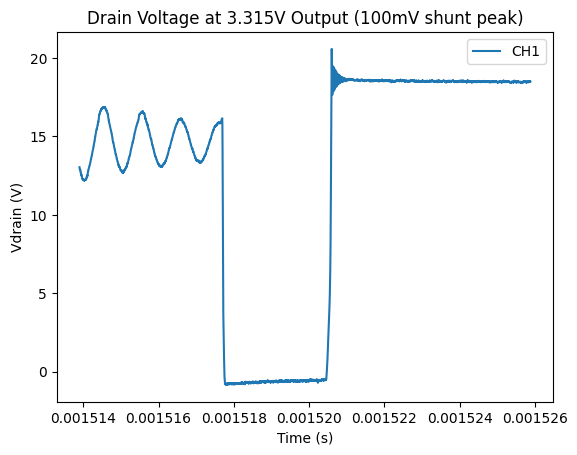

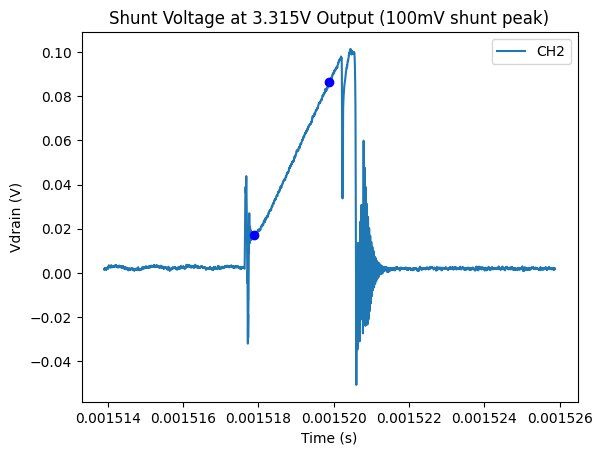

In [19]:
#100mV shunt peak
#read in data
[inductor_data_1, inductor_data_1_t0, inductor_data_1_dT] = read_rigol_csv('data/inductor_data_100mV.csv')
#CH 1: Drain Voltage
#CH 2: Shunt Voltage
#Input voltage: 18.01V
#Output voltage: 3.315V

#apply data filter
inductor_data_1['CH1'] = inductor_data_1['CH1'].rolling(10).mean()
inductor_data_1['CH2'] = inductor_data_1['CH2'].rolling(10).mean()

#plot drain voltage
fig, ax = plt.subplots()
inductor_data_1.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Drain Voltage at 3.315V Output (100mV shunt peak)")

#plot shunt voltage
fig, ax = plt.subplots()
inductor_data_1.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Shunt Voltage at 3.315V Output (100mV shunt peak)")
ax.plot(inductor_data_1['X'].get(2000), inductor_data_1['CH2'].get(2000), "bo")
ax.plot(inductor_data_1['X'].get(3000), inductor_data_1['CH2'].get(3000), "bo")

#calculate slope of linear region for inductor
Rshunt = 0.05 #Ohms
dVdt_1 = (inductor_data_1['CH2'].get(3000)-inductor_data_1['CH2'].get(2000))/(inductor_data_1['X'].get(3000)-inductor_data_1['X'].get(2000))
dIdt_1 = dVdt_1/Rshunt
Vl_1 = 18.01-3.315
l1 = Vl_1/dIdt_1
print("Calculated inductance for 100mV shunt peak:", l1)

Calculated inductance for 200mV shunt peak: 1.971428571428573e-05


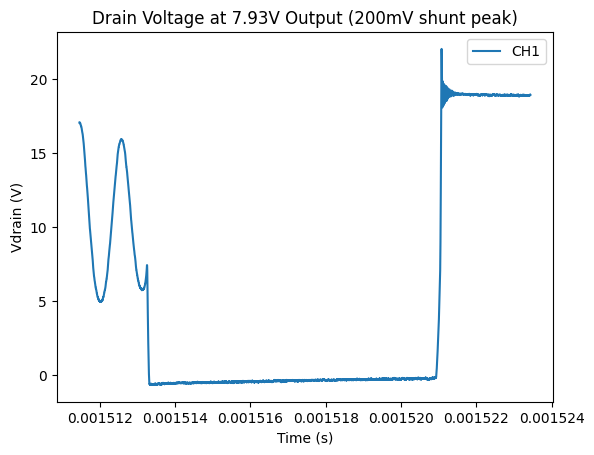

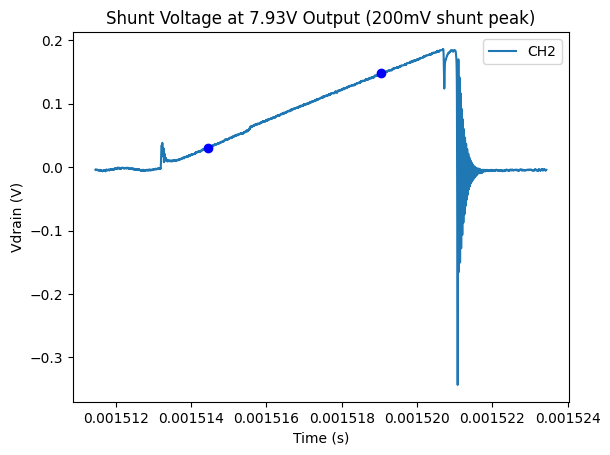

In [20]:
#200mV shunt peak
#read in data
[inductor_data_2, inductor_data_2_t0, inductor_data_2_dT] = read_rigol_csv('data/inductor_data_200mV.csv')
Vin2 = 18.01 #V
Vout2 = 7.93 #V
#CH 1: Drain Voltage
#CH 2: Shunt Voltage
#Input voltage: 18.01V
#Output voltage: 7.93V

#apply data filter
inductor_data_2['CH1'] = inductor_data_2['CH1'].rolling(10).mean()
inductor_data_2['CH2'] = inductor_data_2['CH2'].rolling(10).mean()

#plot drain voltage
fig, ax = plt.subplots()
inductor_data_2.plot(x="X", y="CH1", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Drain Voltage at 7.93V Output (200mV shunt peak)")
#ax.set_xlim((-0.5e-5,1.8e-5))

#plot shunt voltage
fig, ax = plt.subplots()
inductor_data_2.plot(x="X", y="CH2", ax = ax)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Vdrain (V)")
ax.set_title("Shunt Voltage at 7.93V Output (200mV shunt peak)")
#ax.set_xlim((-0.5e-5,1.8e-5))
ax.plot(inductor_data_2['X'].get(1500), inductor_data_2['CH2'].get(1500), "bo")
ax.plot(inductor_data_2['X'].get(3800), inductor_data_2['CH2'].get(3800), "bo")

#calculate slope of linear region for inductor
Rshunt = 0.05 #Ohms
dVdt_2 = (inductor_data_2['CH2'].get(3800)-inductor_data_2['CH2'].get(1500))/(inductor_data_2['X'].get(3800)-inductor_data_2['X'].get(1500))
dIdt_2 = dVdt_2/Rshunt
Vl_2 = Vin2-Vout2
l2 = Vl_2/dIdt_2
print("Calculated inductance for 200mV shunt peak:", l2)

In [21]:
#Averaged inductance
l_avg = (l1+l2)/2
print("Averaged inductance value:", l_avg)

Averaged inductance value: 2.046265671395491e-05


Calculated inductance at 100mV peak shunt: 21.21uH

Calculated inductance at 200mV peak shunt: 19.71uH

Averaged inductance value: 20.45uH

7. Based on our experimental data, we calculated our inductance value to be similar to what we measured on the LCR meter. One note is that our inductor's core did not saturate during this testing despite a reluctance value not within the calculated range. We realized that core saturation is also temperature dependent, and because we did not run our experiment for very long, our core did not saturate in the time we were running. If our experiment ran longer and our core heated up, we would likely see a nonlinear relationship on the shunt voltage waveforms.

## Post-Lab Analysis

8. Our initial design met the required specifications during the lab experiment. However, our inductor likely would have saturated had the experiment been running for a longer time and our core had time to heat up. A potential redesign would include more turns to meet the minimum number of turns specification, ensuring that our core would not saturate during use.

9. 
Lab Inductor:

![inductor_drawing](images/inductor_drawing.jpg)

10. Updated digital twin:

![digital_twin](images/lab4_digital_twin.png)

This digital twin has also been included with the lab submission. For the waveforms below, the shunt voltage is the top waveform, while the botton waveform is the drain voltage.

Waveforms simulated at 100mV peak shunt:

![sim_100mV_shunt](images/simulated_100mV.png)

Waveforms simulated at 200mV peak shunt:

![sim_200mV_shunt](images/simulated_200mV.png)

Similar to lab 3, the simulated waveforms exhibit the same behavior as the waveforms in the physical lab hardware, so I can be confident that the digital twin is accurately modelling the hardware. The physical waveforms have a better resolution compared to the data we gathered in lab 3, as we made sure that both scope probes were set to the correct 10x setting. For both waveforms at both peak shunt voltages, the waveforms have similar frequencies, amplitudes, and linear behavior on the shunt voltage. Similar to lab 3, the simulated waveforms also do not capture any of the ringing present on the physical hardware's drain and shunt voltages. The physical shunt waveforms seem to have a slightly higher amplitude than the simulated waveform, which may be due to imperfect adjustment of the circuit's potentiometer.

11. The lambda (Vs) vs Current (A) characteristic of the inductor is plotted below for both peak shunt settings.

Text(0.5, 1.0, 'Lambda vs Ishunt at 7.93V Output (200mV shunt peak)')

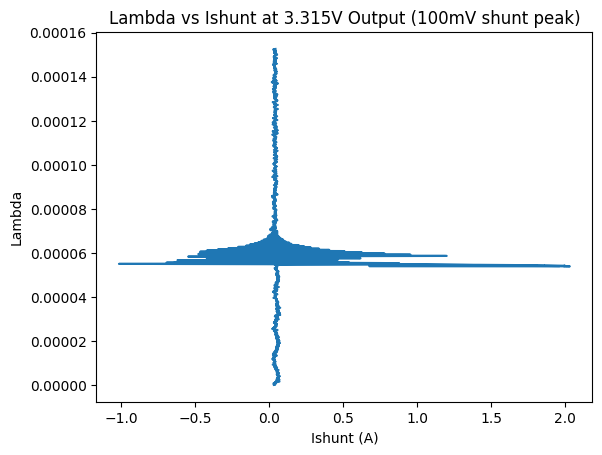

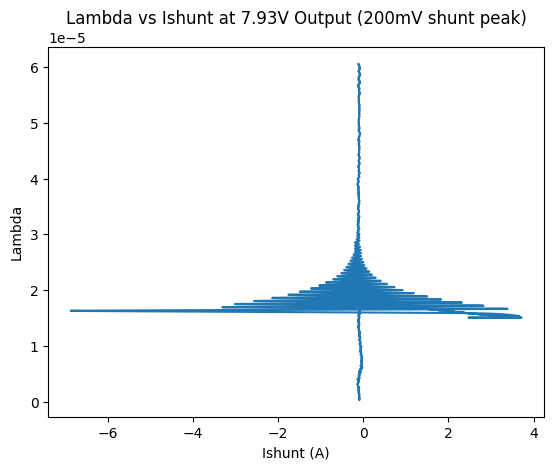

In [48]:
#plot lambda (drain voltage integrated with time) vs shunt current

#100mV
#calculate lambda
lambda_100mV = scipy.integrate.cumulative_trapezoid(inductor_data_1['CH1'][9:],inductor_data_1['X'][9:])

#calculate shunt current
I_shunt_100mV = inductor_data_1['CH2']/Rshunt

#plot lambda vs shunt current
fig, ax = plt.subplots()
plt.plot(I_shunt_100mV[0:5990],lambda_100mV)
ax.set_xlabel("Ishunt (A)")
ax.set_ylabel("Lambda")
ax.set_title("Lambda vs Ishunt at 3.315V Output (100mV shunt peak)")

#200mV
#calculate lambda
lambda_200mV = scipy.integrate.cumulative_trapezoid(inductor_data_2['CH1'][9:],inductor_data_2['X'][9:])

#calculate shunt current
I_shunt_200mV = inductor_data_2['CH2']/Rshunt

#plot lambda vs shunt current
fig, ax = plt.subplots()
plt.plot(I_shunt_200mV[0:5990],lambda_200mV)
ax.set_xlabel("Ishunt (A)")
ax.set_ylabel("Lambda")
ax.set_title("Lambda vs Ishunt at 7.93V Output (200mV shunt peak)")

I'm not entirely sure how to best interpret these graphs due to the amount of apparent noise present in them. It is hard to see any hysteretic loops to look for losses in the data. Capturing several waveforms from the oscilloscope next time might make the loop shapes more clear.